**1. Общая информация**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

**1.1 Начнем анализ с  таблицы 'users'**

In [3]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


В столбце **churn_date** на первый взгляд много пропусков. Проверим таблицу на дубликаты и пропуски

In [4]:
print("Число дубликатов в таблице users:", users.duplicated().sum())

Число дубликатов в таблице users: 0


In [5]:
print("Число пропусков в таблице users:", users.isnull().sum())

Число пропусков в таблице users: user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


**churn_date** - дата прекращения пользования тарифом. Оставляем так, как есть. Т.е. если значение пустое, значит клиент им еще ползьуется. Посмотрим на тип данных

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Очевидно, надо менять стоблец **reg_date** с object на datetime. Добавим столбцы с месяцем

In [7]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['month'] = users['reg_date'].apply(lambda x: x.month)
users.info() #посмотрим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
month         500 non-null int64
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 35.3+ KB


**1.2 Проанализируем таблицу 'calls'**

In [8]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропусков нет, дату переведём в datetime и посмотрим на дубликаты:

In [10]:
print("Число дубликатов в таблице calls:", calls.duplicated().sum())

Число дубликатов в таблице calls: 0


In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].apply(lambda x: x.month)
calls.info() #проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


Оценим длительность звонков. Построим гистограмму распределения звонков по времени:

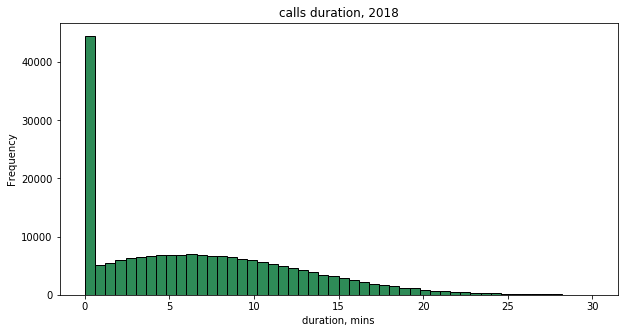

In [12]:
fig, ax = plt.subplots()
ax.set_title('calls duration, 2018')
ax.set_xlabel('duration, mins')
calls['duration'].plot(kind='hist', ec='black', bins = 50, range =(0,30), grid = False, figsize = (10,5), color ='seagreen');

Очень много нулевых звонков. Уверен, это те звонки, где соединения не произошло.(Абонент вне доступа и тд.) К тому же «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Есть смысл округлить все звонки до 1 минуты и откинуть нулевые звонки. Они никак не влияют на прибыль "Мегалайна" и на уменьшение счета клиента соответственно. Из гистограммы видно, что их число примрно 40000

In [13]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()

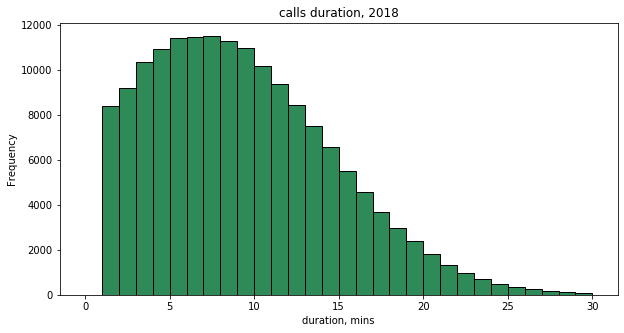

In [14]:
fig, ax = plt.subplots()
ax.set_title('calls duration, 2018')
ax.set_xlabel('duration, mins')
calls['duration'].plot(kind='hist', ec='black', bins = 30, range =(0,30), grid = False, figsize = (10,5), color ='seagreen');

**1.3 Проанализируем таблицу 'messages'**

In [15]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропусков нет, дату переведём в datetime и посмотрим на дубликаты:

In [17]:
print("Число дубликатов в таблице messages:", messages.duplicated().sum())

Число дубликатов в таблице messages: 0


In [18]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].apply(lambda x: x.month)
messages.info() #проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


Пропусков нет, данные корректны, идем дальше

**1.4 Посмотрим на таблицу 'internet':**

In [19]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Пропусков нет, дату переведём в datetime и посмотрим на дубликаты:

In [21]:
print("Число дубликатов в таблице calls:", internet.duplicated().sum())

Число дубликатов в таблице calls: 0


In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].apply(lambda x: x.month)
internet.info() #проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


Оценим  интернет-сессии. Построим гистограмму распределения объема траффика:

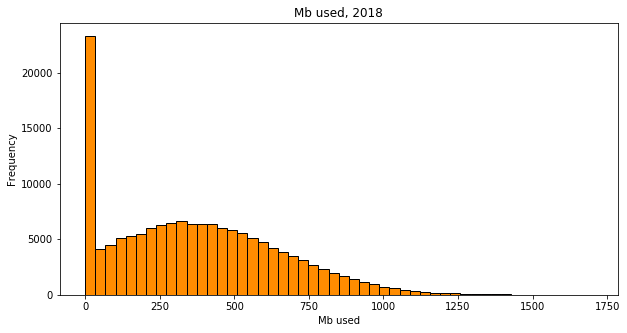

In [23]:
fig, ax = plt.subplots()
ax.set_title('Mb used, 2018')
ax.set_xlabel('Mb used')
internet['mb_used'].plot(kind='hist', ec='black', bins = 50, range =(0,1700), grid = False, figsize = (10,5),
                         color ='darkorange');

Ситуация, аналогичная звонкам. Более 20000 сессий имеют 0 траффик. Помним про павила "Мегалайна" и округлим весь мелкий трафик до 1 Мb, а нулевой траффик откинем. Он, аналогично звонкам, прибыли не приносит.

In [24]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

Повторим гистограмму без нулей 

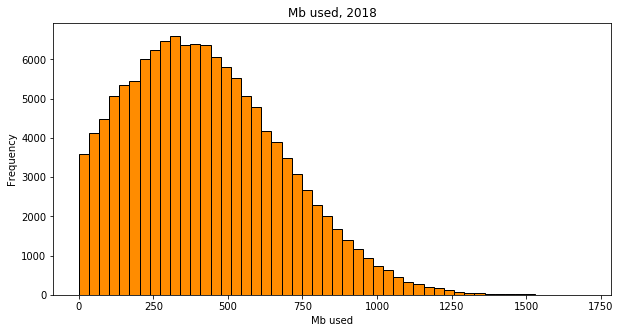

In [25]:
fig, ax = plt.subplots()
ax.set_title('Mb used, 2018')
ax.set_xlabel('Mb used')
internet['mb_used'].plot(kind='hist', ec='black', bins = 50, range =(0,1700), grid = False, figsize = (10,5),
                         color ='darkorange');

**1.5 Посмотрим на таблицу 'tariffs':**

In [26]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Справочная информация.

**1.6 Процентное соотношение по городам**

Посмотрим распределение пользователей по месту жительства. Состави новый датафрейм в процентах и построим по нему график

In [27]:
def city_percent(df):
    percent = (df.groupby('city').size()/len(users))*100
    new_frame = {'Процент': percent}
    dataframe = pd.DataFrame(new_frame).sort_values(by = 'Процент', ascending = False)
    return dataframe

city_percent(users).head(15)

,Процент
city,
Москва,19.8
Санкт-Петербург,7.8
Новосибирск,3.2
Казань,2.8
Омск,2.8
Уфа,2.4
Набережные Челны,2.2
Краснодар,2.2
Екатеринбург,2.2


**1.6 Оценим тип связи, коротым чаще всего пользуются. Построим график по месяцам**

In [28]:
def traffic_per_month(df):
    plt.figure(figsize=(15,5))
    df_list = df
    ax = plt.gca()
  
    color_list = ['darkolivegreen', 'green', 'lime',]
    names_for_legend = ['calls','sms','internet']
    legend_list = []
    
    for i in range(len(df)):
        current_df = df_list[i]
        current_df_filtered = current_df.groupby('month')['id'].count().reset_index()
        plot = current_df_filtered.plot(x='month', y='id', kind='bar', ec='black', color=color_list[i],
                                 ax=ax, width=0.1, position = i)
        legend_list.append(names_for_legend[i])
        
    ax.legend(legend_list)
    ax.set_title('connection type, 2018')

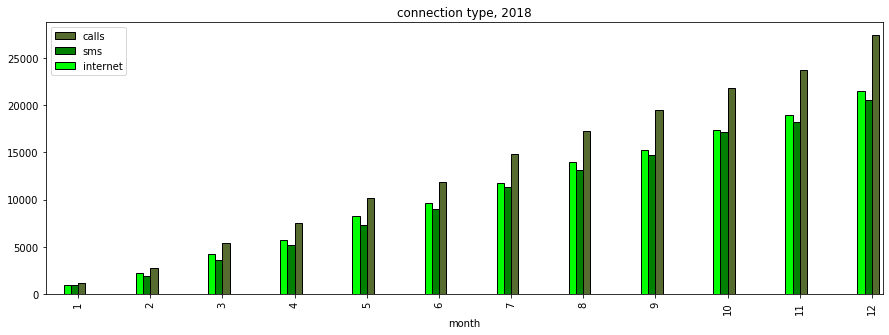

In [29]:
traffic_per_month([calls, messages, internet])

Чаще всего пользуются звонками. Интересная зависимость: похоже старт тарифов попал на начало 2018 года

**2 Расчет помесячной выручки для каждого клиента**

Оценим для каждого пользователя:

количество сделанных звонков и израсходованных минут разговора по месяцам;


количество отправленных сообщений по месяцам;


объем израсходованного интернет-трафика по месяцам;


помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)

**2.1 Сборка данных в один датафрейм**

In [30]:
calls = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
messages = messages.groupby(['user_id', 'month'])['id'].count()
internet = internet.groupby(['user_id', 'month']).sum()['mb_used']

In [31]:
full_df = pd.concat([calls, messages, internet], axis=1)
full_df = full_df.reset_index()
full_df.head() #выводим результат

,user_id,month,count,sum,id,mb_used
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0


Добавим столбцы с тарифом и городом

In [32]:
map1 = dict(pd.Series(users['tariff'].values, index=users['user_id']))
full_df['Тариф'] = full_df['user_id'].map(map1)

map2 = dict(pd.Series(users['city'].values, index=users['user_id']))
full_df['Город'] = full_df['user_id'].map(map2)

Переименуем столбцы

In [33]:
full_df.columns = ['User_id', 'Месяц', 'Кол-во звонков, шт.', 'Звонки, мин.', 'СМС, шт.', 'Интернет, Мб', 'Тариф', 'Город']

In [34]:
full_df.head(10)  #выводим результат

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар
5,1000,10,44.0,350.0,73.0,14717.0,ultra,Краснодар
6,1000,11,37.0,338.0,58.0,14768.0,ultra,Краснодар
7,1000,12,38.0,333.0,70.0,9827.0,ultra,Краснодар
8,1001,11,45.0,430.0,NaN,18452.0,smart,Москва
9,1001,12,47.0,414.0,NaN,14053.0,smart,Москва


**2.1 Оценка и заполнение пропусков**

In [35]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
User_id                3214 non-null int64
Месяц                  3214 non-null int64
Кол-во звонков, шт.    3168 non-null float64
Звонки, мин.           3168 non-null float64
СМС, шт.               2717 non-null float64
Интернет, Мб           3201 non-null float64
Тариф                  3214 non-null object
Город                  3214 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 201.0+ KB


Во всех типах связи есть пропуски. Посмотрим есть ли клиенты, которые не воспользовались всеми тремя типами связи. Если да, то удалим таких клиентов. Если их нет. Заменим пропуски на 0.

In [36]:
full_df[(full_df['Интернет, Мб'].isnull()) & (full_df['СМС, шт.'].isnull()) & (full_df['Звонки, мин.'].isnull())]

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город


In [37]:
full_df = full_df.fillna(0)
full_df.info() #проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
User_id                3214 non-null int64
Месяц                  3214 non-null int64
Кол-во звонков, шт.    3214 non-null float64
Звонки, мин.           3214 non-null float64
СМС, шт.               3214 non-null float64
Интернет, Мб           3214 non-null float64
Тариф                  3214 non-null object
Город                  3214 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 201.0+ KB


**2.2 Сравнение количества пользователей и частоты использования тарифов и видов связи**

Посмотрим на соотношение использования тарифов

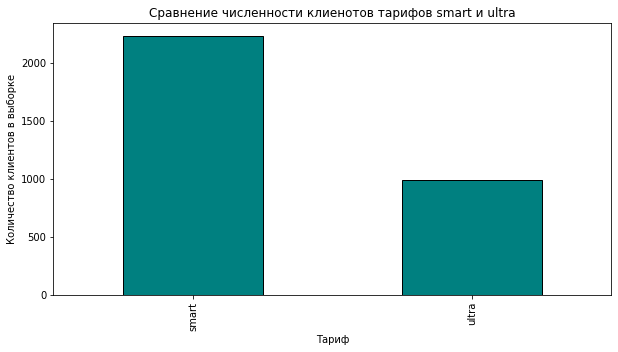

In [38]:
ax = plt.gca()
ax.set_title('Сравнение численности клиенотов тарифов smart и ultra')
ax.set_ylabel('Количество клиентов в выборке')
full_df.groupby('Тариф')['User_id'].count().plot(kind='bar',  figsize=(10,5), ec='black', ax=ax, color='teal');


**2.3 Распределение звонков, смс, интернет-траффика по тарифам**

Напишем функцию для этих целей

In [39]:
def connection_percent(df, column):
    sum1 = df.groupby('Тариф')[column].sum()
    percent_of_sum1 = (sum1 / df[column].sum())*100
    new_frame = {'Процент': percent_of_sum1}
    dataframe = pd.DataFrame(new_frame).sort_values(by = 'Процент', ascending = False).round(2);
    return dataframe

Сперва снова посмотрим на данные из прошлого пункта, но уже в %

In [40]:
connection_percent(full_df, 'User_id')

,Процент
Тариф,
smart,69.07
ultra,30.93


Сформируем процентное соотношение по объему интрентет-траффика:

In [41]:
connection_percent(full_df, 'Интернет, Мб')

,Процент
Тариф,
smart,65.33
ultra,34.67


Сформируем процентное соотношение по времени звонков

In [42]:
connection_percent(full_df, 'Звонки, мин.')

,Процент
Тариф,
smart,64.23
ultra,35.77


Сформируем процентное соотношение по количеству смс

In [43]:
connection_percent(full_df, 'СМС, шт.')

,Процент
Тариф,
smart,60.48
ultra,39.52


Как мы видим доли по количеству абонетов в каждом из тарифов сопоставимы с долями по звонкам, смскам и траффику

**2.4 Добавление информации о помесячной выручке с каждого пользователя:**

Добавим столбец стоимости по тарифу

In [44]:
price = {'smart': 550, 'ultra': 1950}
full_df['Аб. плата, руб.'] = full_df['Тариф'].map(price)

Минуты сверх, СМС сверх, Мб сверх, Доплата - для добавления этих столбцов напишем следующие функции:

In [45]:
def calls_over(row):
    if row['Тариф'] == 'smart':
        if row['Звонки, мин.'] > 500:
            return  row['Звонки, мин.'] - 500
        else:
            return 0
    else: 
        if row['Звонки, мин.'] > 3000:
            return row['Звонки, мин.'] - 3000
        else:
            return 0

In [46]:
full_df['Минуты сверх'] = full_df.apply(calls_over, axis=1)

In [47]:
def sms_over(row):
    if row['Тариф'] == 'smart':
        if row['СМС, шт.'] > 50:
            return  row['СМС, шт.'] - 50
        else:
            return 0
    else:
        if row['СМС, шт.'] > 1000:
            return  row['СМС, шт.'] - 1000
        else:
            return 0

In [48]:
full_df['СМС сверх'] = full_df.apply(sms_over, axis=1)

In [49]:
def traffic_over(row):
    if row['Тариф'] == 'smart':
        if row['Интернет, Мб'] > 15360:
            return row['Интернет, Мб'] - 15360
        else:
            return 0
    else:
        if row['Интернет, Мб'] > 30720:
            return row['Интернет, Мб'] - 30720
        else:
            return 0

In [50]:
full_df['Мб сверх'] = full_df.apply(traffic_over, axis=1)

In [51]:
def month_sum_over(row):
    sum_per_month = 0
    if row['Тариф'] == 'smart':
        sum_per_month = np.ceil(row['Минуты сверх'] * 3) #округлим
        sum_per_month = row['СМС сверх'] * 3
        sum_per_month = np.ceil((row['Мб сверх']/1024) * 200) # Мб в Гб + округлим
        return sum_per_month
    
    else:
        sum_per_month = np.ceil(row['Минуты сверх'] * 1) #округлим
        sum_per_month = row['СМС сверх'] * 1
        sum_per_month = np.ceil((row['Мб сверх']/1024) * 150) # Мб в Гб + округлим
        return sum_per_month

In [52]:
full_df['Доплата, руб.'] = full_df.apply(month_sum_over, axis=1)
full_df.tail(10) #проверим

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Доплата, руб."
3204,1497,11,48.0,371.0,14.0,14174.0,smart,Челябинск,550,0.0,0.0,0.0,0.0
3205,1497,12,58.0,545.0,17.0,19940.0,smart,Челябинск,550,45.0,0.0,4580.0,895.0
3206,1498,7,20.0,175.0,20.0,7486.0,smart,Владикавказ,550,0.0,0.0,0.0,0.0
3207,1498,8,43.0,400.0,62.0,24270.0,smart,Владикавказ,550,0.0,12.0,8910.0,1741.0
3208,1498,9,53.0,471.0,44.0,22166.0,smart,Владикавказ,550,0.0,0.0,6806.0,1330.0
3209,1498,10,30.0,247.0,42.0,20604.0,smart,Владикавказ,550,0.0,0.0,5244.0,1025.0
3210,1499,9,8.0,70.0,11.0,1848.0,smart,Пермь,550,0.0,0.0,0.0,0.0
3211,1499,10,44.0,449.0,48.0,17809.0,smart,Пермь,550,0.0,0.0,2449.0,479.0
3212,1499,11,62.0,612.0,59.0,17984.0,smart,Пермь,550,112.0,9.0,2624.0,513.0
3213,1499,12,56.0,492.0,66.0,13077.0,smart,Пермь,550,0.0,16.0,0.0,0.0


Немного подправим тип данных:

In [53]:
for column in ['Минуты сверх', 'Мб сверх']:
    full_df[column] = full_df[column].astype('float')

for column in ['СМС сверх', 'Доплата, руб.', 'СМС, шт.', 'Кол-во звонков, шт.']:
    full_df[column] = full_df[column].astype('int')

In [54]:
full_df.info() #посмотрим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 13 columns):
User_id                3214 non-null int64
Месяц                  3214 non-null int64
Кол-во звонков, шт.    3214 non-null int64
Звонки, мин.           3214 non-null float64
СМС, шт.               3214 non-null int64
Интернет, Мб           3214 non-null float64
Тариф                  3214 non-null object
Город                  3214 non-null object
Аб. плата, руб.        3214 non-null int64
Минуты сверх           3214 non-null float64
СМС сверх              3214 non-null int64
Мб сверх               3214 non-null float64
Доплата, руб.          3214 non-null int64
dtypes: float64(4), int64(7), object(2)
memory usage: 326.5+ KB


**2.5 Анализ данных по доплатам**

Сложим столбцы абонентская плата и доплата

In [55]:
full_df['Итоговая сумма, руб.'] = full_df['Доплата, руб.'] + full_df['Аб. плата, руб.']
full_df.tail(10) #посмотри на результат

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Доплата, руб.","Итоговая сумма, руб."
3204,1497,11,48,371.0,14,14174.0,smart,Челябинск,550,0.0,0,0.0,0,550
3205,1497,12,58,545.0,17,19940.0,smart,Челябинск,550,45.0,0,4580.0,895,1445
3206,1498,7,20,175.0,20,7486.0,smart,Владикавказ,550,0.0,0,0.0,0,550
3207,1498,8,43,400.0,62,24270.0,smart,Владикавказ,550,0.0,12,8910.0,1741,2291
3208,1498,9,53,471.0,44,22166.0,smart,Владикавказ,550,0.0,0,6806.0,1330,1880
3209,1498,10,30,247.0,42,20604.0,smart,Владикавказ,550,0.0,0,5244.0,1025,1575
3210,1499,9,8,70.0,11,1848.0,smart,Пермь,550,0.0,0,0.0,0,550
3211,1499,10,44,449.0,48,17809.0,smart,Пермь,550,0.0,0,2449.0,479,1029
3212,1499,11,62,612.0,59,17984.0,smart,Пермь,550,112.0,9,2624.0,513,1063
3213,1499,12,56,492.0,66,13077.0,smart,Пермь,550,0.0,16,0.0,0,550


Из таблицы видно, что часть клиентов превышает лимиты

Посмотрим, какой процент клиентов переплачивает в зависимости от тарифа. Запишем наши данные в новый датафрейм

In [56]:
def percent_frame(df):
    sum_smart_extra = (df[(df['Тариф'] == 'smart') & (df['Доплата, руб.'] > 0)].count()['User_id']) 
    sum_smart_normal =(df[(df['Тариф'] == 'smart') & (df['Доплата, руб.'] == 0)].count()['User_id'])
    
    sum_ultra_extra = (df[(df['Тариф'] == 'ultra') & (df['Доплата, руб.'] > 0)].count()['User_id']) 
    sum_ultra_normal = (df[(df['Тариф'] == 'ultra') & (df['Доплата, руб.'] == 0)].count()['User_id'])
    
    percent_smart_extra = (sum_smart_extra / (sum_smart_extra + sum_smart_normal)) * 100
    percent_smart_normal = (sum_smart_normal / (sum_smart_extra + sum_smart_normal)) * 100
    
    percent_ultra_extra = (sum_ultra_extra / (sum_ultra_extra + sum_ultra_normal)) * 100
    percent_ultra_normal = (sum_ultra_normal / (sum_ultra_extra + sum_ultra_normal)) * 100
    
    extraframe = {'Процент перепалт smart': percent_smart_extra, 'Процент без переплат smart': percent_smart_normal, 
                  'Процент перепалт ultra': percent_ultra_extra, 'Процент без переплат ultra': percent_ultra_normal }
    dataframe = pd.DataFrame(extraframe, index=[0]).sort_values(by = 'Процент перепалт smart', ascending = 'False').round(2)
    return dataframe

percent_frame(full_df)

,Процент перепалт smart,Процент без переплат smart,Процент перепалт ultra,Процент без переплат ultra
0,58.73,41.27,13.6,86.4


Как видим из таблицы 58,7% пользователей тарифа smart вынуждены переплачивать. Пользователи ultra - всего лишь 13.6%

Построим гистограмму по переплатам

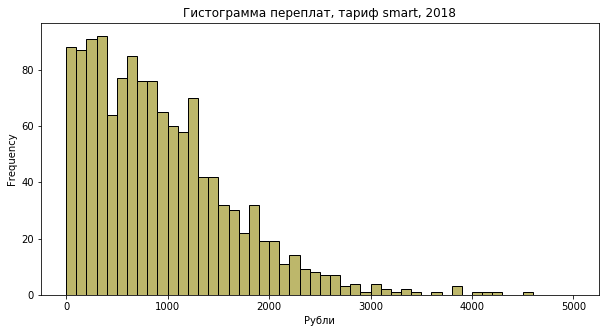

In [57]:
fig, ax = plt.subplots()
ax.set_title('Гистограмма переплат, тариф smart, 2018')
ax.set_xlabel('Рубли')
full_df[(full_df['Тариф'] == 'smart') & (full_df['Доплата, руб.'] > 0)]['Доплата, руб.'].plot(kind='hist', 
ec='black', bins = 50, range =(0,5000), grid = False, figsize = (10,5), color ='darkkhaki');

При абонентской плате в 550 рублей основная масса переплат до 1200р. Чуть больше, чем в 2 раза. Это явно перебор. Приблизим

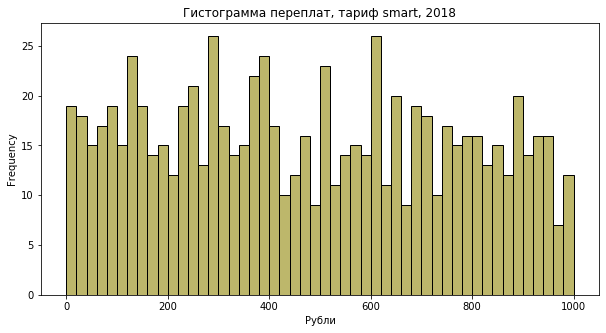

In [58]:
fig, ax = plt.subplots()
ax.set_title('Гистограмма переплат, тариф smart, 2018')
ax.set_xlabel('Рубли')
full_df[(full_df['Тариф'] == 'smart') & (full_df['Доплата, руб.'] > 0) & (full_df['Доплата, руб.'] < 1000)]['Доплата, руб.'].plot(kind='hist', 
ec='black', bins = 50, range =(0,1000), grid = False, figsize = (10,5), color ='darkkhaki');

Видны пики в районе 250, 400 и 600 рублей. 200, 400 и 600р - похоже на дозаказ интернета по 1Гб. 250р на интернет + некоторая доля смс или звонков. 


Построим аналогичные графики для тарифа ultra

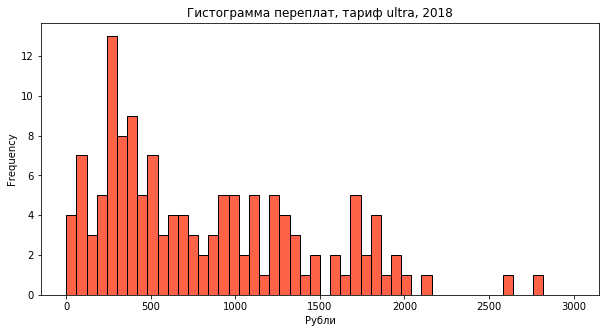

In [59]:
fig, ax = plt.subplots()
ax.set_title('Гистограмма переплат, тариф ultra, 2018')
ax.set_xlabel('Рубли')
full_df[(full_df['Тариф'] == 'ultra') & (full_df['Доплата, руб.'] > 0)]['Доплата, руб.'].plot(kind='hist', 
ec='black', bins = 50, range =(0,3000), grid = False, figsize = (10,5), color ='tomato');

Основная часть переплат - в районе 250 рублей.

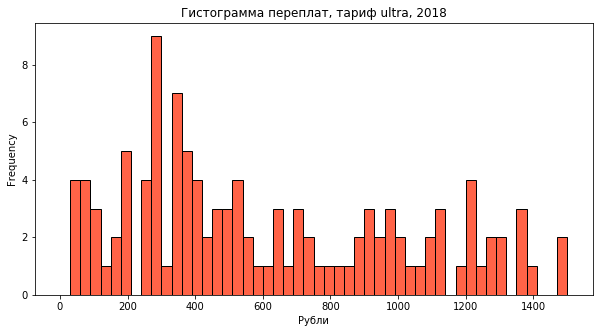

In [60]:
fig, ax = plt.subplots()
ax.set_title('Гистограмма переплат, тариф ultra, 2018')
ax.set_xlabel('Рубли')
full_df[(full_df['Тариф'] == 'ultra') & (full_df['Доплата, руб.'] > 0) & (full_df['Доплата, руб.'] < 1500)]['Доплата, руб.'].plot(kind='hist', 
ec='black', bins = 50, range =(0,1500), grid = False, figsize = (10,5), color ='tomato');

**2.6 Дозаказ услуг**

Посмотрим, какие услуги по тарифам заказывают чаще всего. Сведём данные в датафрейм

In [61]:
full_df.groupby('Тариф').sum()[['Минуты сверх', 'СМС сверх', 'Мб сверх']]

,Минуты сверх,СМС сверх,Мб сверх
Тариф,,,
smart,92739.0,12928,6175667.0
ultra,0.0,0,743233.0


На тарифе ultra дозаказывают только интернет. На смарте же не хватает всех типов услуг.

**2.7 Оценка выручки**

Для оценки прибыльности воспользуемся функцией, написанной выше.

In [62]:
connection_percent(full_df, 'Итоговая сумма, руб.')

,Процент
Тариф,
smart,54.52
ultra,45.48


Как итог тариф smart приности больше прибыли

**Шаг 3. Проанализируем данные**

Опишим поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммыи и опишем распределения.

Построим boxplot'ы по интересущим нас данным (смс, звонки, интернет):

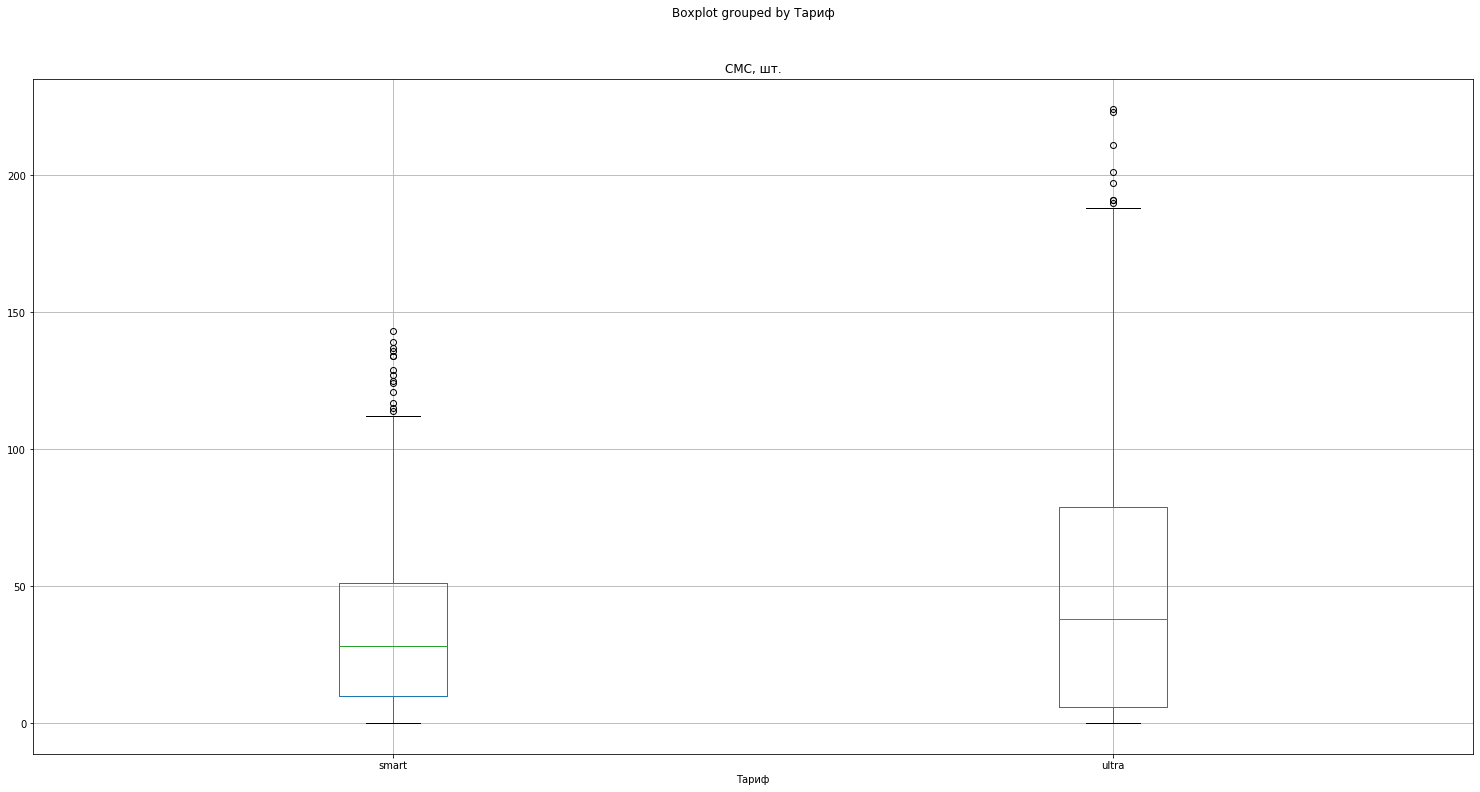

In [63]:
full_df.boxplot('СМС, шт.', by = 'Тариф', figsize = (25,12.5));

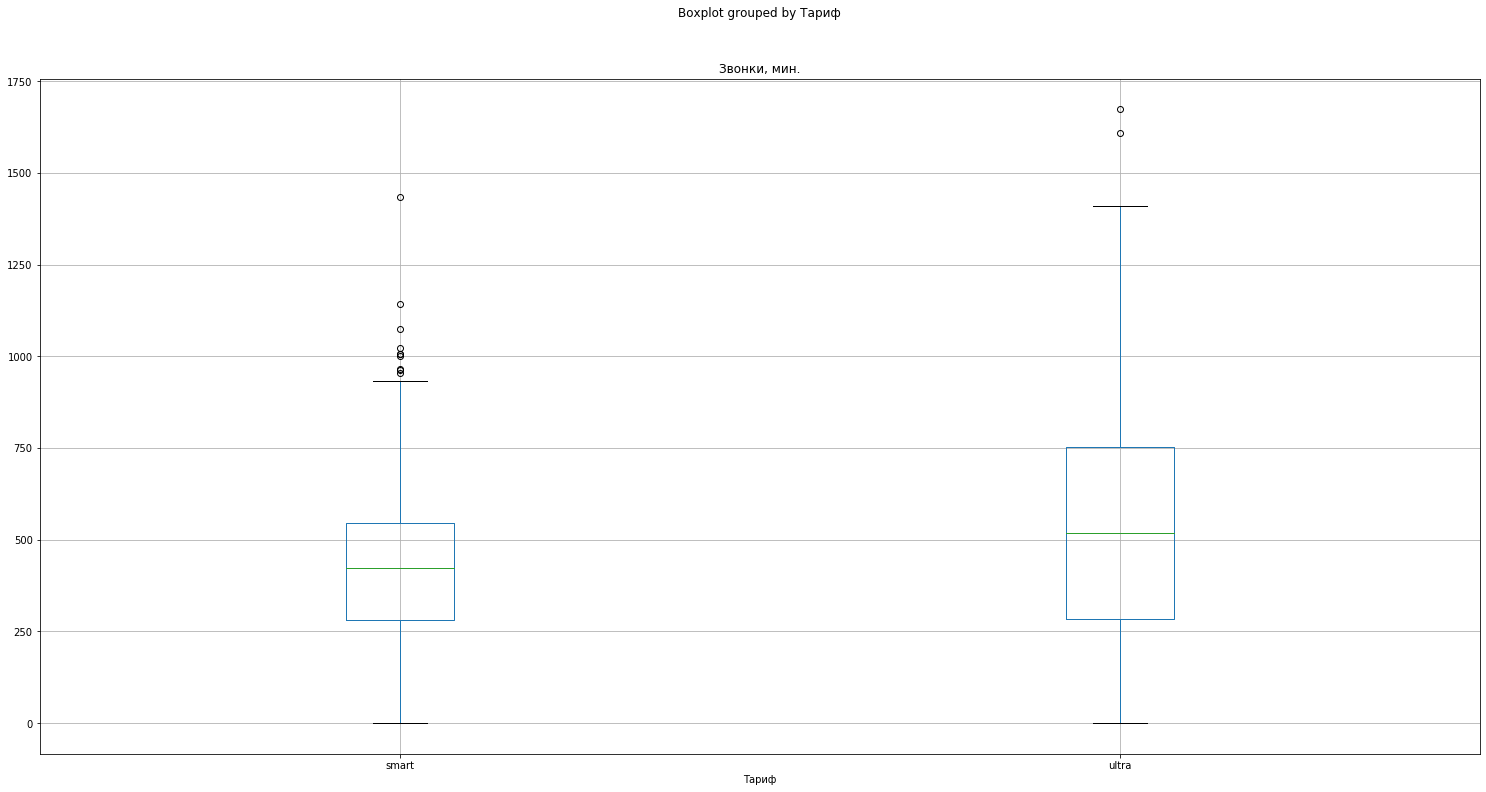

In [64]:
full_df.boxplot('Звонки, мин.', by = 'Тариф', figsize = (25,12.5));

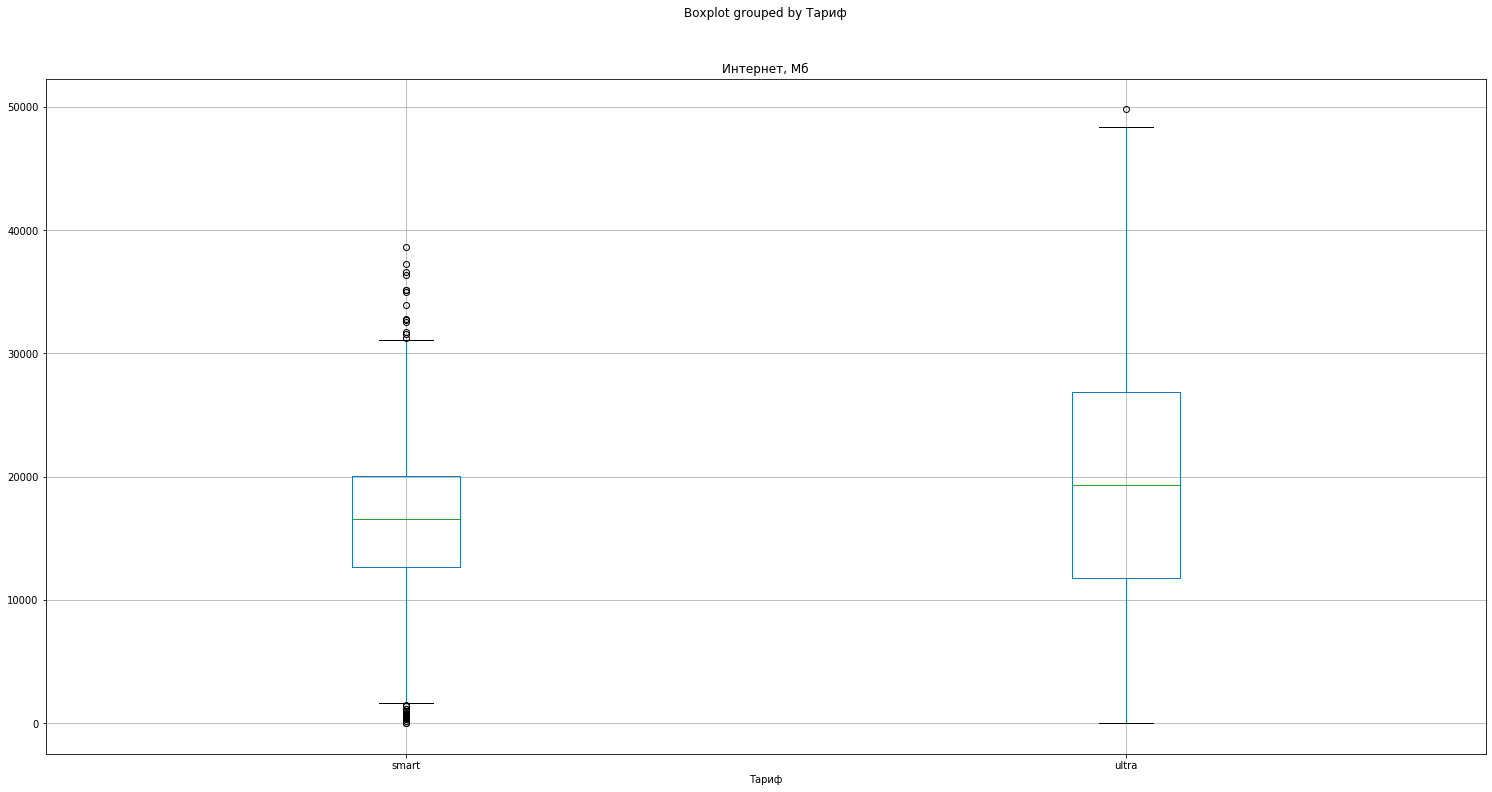

In [65]:
full_df.boxplot('Интернет, Мб', by = 'Тариф',figsize = (25,12.5) );

**3.1 Определим интервалы**

Напишем функцию для этих целей:

In [66]:
def intervals(column, data_filter):
    data_filter == 'Тариф'
    data1, data2 = 'smart', 'ultra'
    format_end1 = 'тарифа smart'
    format_end2 = 'тарифа "ultra"'
    
    q1_1 = full_df[full_df[data_filter] == data1][column].quantile(0.25)
    q3_1 = full_df[full_df[data_filter] == data1][column].quantile(0.75)
    diff_1 = q3_1 - q1_1
    
    left_int_1 = np.where((q1_1 - 1.5 * diff_1) > 0, q1_1 - 1.5 * diff_1, 0)
    right_int_1 = np.where((q3_1 + 1.5 * diff_1) > 0, q3_1 + 1.5 * diff_1, 0)
    
    q1_2 = full_df[full_df[data_filter] == data2][column].quantile(0.25)
    q3_2 = full_df[full_df[data_filter] == data2][column].quantile(0.75)
    diff_2 = q3_2 - q1_2
    
    left_int_2 = np.where((q1_2 - 1.5 * diff_2) > 0, q1_2 - 1.5 * diff_2, 0)
    right_int_2 = np.where((q3_2 + 1.5 * diff_2) > 0, q3_2 + 1.5 * diff_2, 0)
    
    print('Интервала для столбца "{}" {}: {} - {}'.format(column, format_end1, left_int_1, right_int_1))
    print('Интервала для столбца "{}" {}: {} - {}'.format(column, format_end2, left_int_2, right_int_2))
    
    return (left_int_1, right_int_1), (left_int_2, right_int_2)
    

In [67]:
calls_smart_data, calls_ultra_data = intervals('Звонки, мин.', 'Тариф');

Интервала для столбца "Звонки, мин." тарифа smart: 0.0 - 939.5
Интервала для столбца "Звонки, мин." тарифа "ultra": 0.0 - 1454.0


In [68]:
sms_smart_data, sms_ultra_data = intervals('СМС, шт.', 'Тариф');

Интервала для столбца "СМС, шт." тарифа smart: 0.0 - 112.5
Интервала для столбца "СМС, шт." тарифа "ultra": 0.0 - 188.5


In [69]:
traffic_smart_data, traffic_ultra_data = intervals('Интернет, Мб', 'Тариф');

Интервала для столбца "Интернет, Мб" тарифа smart: 1543.0 - 31183.0
Интервала для столбца "Интернет, Мб" тарифа "ultra": 0.0 - 49480.0


**3.2 Гистограммы длительности звонков, смс, траффика**

Построим гистограмму для интересующих нас типов связи, найдем среднее медиану, дисперсию и стандартное отклонение:

Начнём со звонков:

In [70]:
calls_smart_data = full_df[(full_df['Тариф'] == 'smart')]['Звонки, мин.']
calls_ultra_data = full_df[(full_df['Тариф'] == 'ultra')]['Звонки, мин.']

mean_calls_smart = calls_smart_data.mean().round(2)
mean_calls_ultra = calls_ultra_data.mean().round(2)

dispersion_calls_smart = calls_smart_data.var().round(2)
dispersion_calls_ultra = calls_ultra_data.var().round(2)

std_calls_smart = calls_smart_data.std().round(2)
std_calls_ultra = calls_ultra_data.std().round(2)

print('Среднее тарифа smart по звонкам:', mean_calls_smart )
print('Среднее тарифа ultra по звонкам:', mean_calls_ultra )

print('Дисперсия тарифа smart по звонкам:', dispersion_calls_smart )
print('Дисперсия тарифа ultra по звонкам:', dispersion_calls_ultra )

print('стандартное отклонение тарифа smart по звонкам:', std_calls_smart )
print('стандартное отклонение тарифа ultra по звонкам:', std_calls_ultra )

Среднее тарифа smart по звонкам: 417.93
Среднее тарифа ultra по звонкам: 526.62
Дисперсия тарифа smart по звонкам: 36219.32
Дисперсия тарифа ultra по звонкам: 100873.63
стандартное отклонение тарифа smart по звонкам: 190.31
стандартное отклонение тарифа ultra по звонкам: 317.61


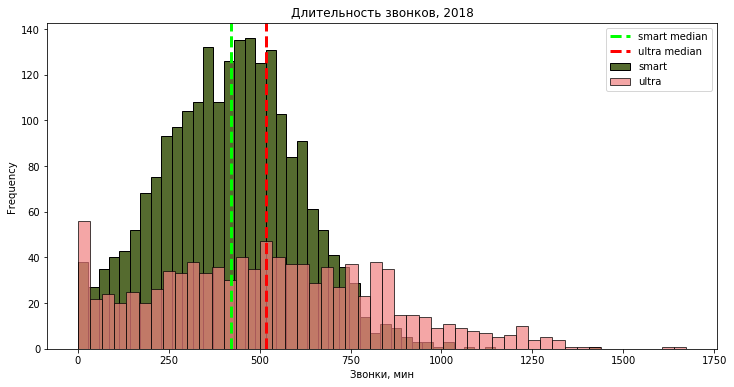

In [71]:
ax = plt.gca()

ax.set_xlabel('Звонки, мин')
ax.set_title('Длительность звонков, 2018')

calls_smart_data.plot(kind='hist', bins=50, figsize=(12,6), ec='black', ax=ax, color='darkolivegreen');
calls_ultra_data.plot(kind='hist', bins=50, figsize=(12,6), ec='black', ax=ax, color='lightcoral', alpha = 0.7);

plt.axvline(x=calls_smart_data.median(),linewidth=3, color='lime', linestyle='--'); #добавим медианы на график
plt.axvline(x=calls_ultra_data.median(),linewidth=3, color='red', linestyle='--'); #добавим медианы на график
plt.legend(['smart median', 'ultra median', 'smart', 'ultra']);

Медиана тарифа ultra больше, но видно, что тариф ultra используют в основном для интренета. По тарифу smart разговаривают больше. Медиана тарифа смарт близка к лимитному значению в 500 минут.

Посмотрим на СМС:

In [72]:
sms_smart_data = full_df[(full_df['Тариф'] == 'smart')]['СМС, шт.']
sms_ultra_data = full_df[(full_df['Тариф'] == 'ultra')]['СМС, шт.']

mean_sms_smart = sms_smart_data.mean().round(2)
mean_sms_ultra = sms_ultra_data.mean().round(2)

dispersion_sms_smart = sms_smart_data.var().round(2)
dispersion_sms_ultra = sms_ultra_data.var().round(2)

std_sms_smart = sms_smart_data.std().round(2)
std_sms_ultra = sms_ultra_data.std().round(2)

print('Среднее тарифа smart по CМС:', mean_sms_smart )
print('Среднее тарифа ultra по СМС:', mean_sms_ultra )

print('Дисперсия тарифа smart по СМС:', dispersion_sms_smart )
print('Дисперсия тарифа ultra по СМС:', dispersion_sms_ultra )

print('стандартное отклонение тарифа smart по СМС:', std_sms_smart )
print('стандартное отклонение тарифа ultra по СМС:', std_sms_ultra )

Среднее тарифа smart по CМС: 33.38
Среднее тарифа ultra по СМС: 49.36
Дисперсия тарифа smart по СМС: 796.81
Дисперсия тарифа ultra по СМС: 2285.27
стандартное отклонение тарифа smart по СМС: 28.23
стандартное отклонение тарифа ultra по СМС: 47.8


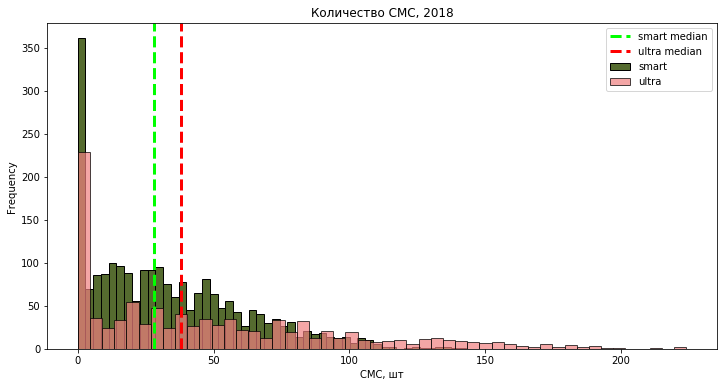

In [73]:
ax = plt.gca()

ax.set_xlabel('СМС, шт')
ax.set_title('Количество СМС, 2018')

sms_smart_data.plot(kind='hist', bins=50, figsize=(12,6), ec='black', ax=ax, color='darkolivegreen', alpha = 1);
sms_ultra_data.plot(kind='hist', bins=50, figsize=(12,6), ec='black', ax=ax, color='lightcoral', alpha = 0.7);

plt.axvline(x=sms_smart_data.median(),linewidth=3, color='lime', linestyle='--'); #добавим медианы на график
plt.axvline(x=sms_ultra_data.median(),linewidth=3, color='red', linestyle='--'); #добавим медианы на график
plt.legend(['smart median', 'ultra median', 'smart', 'ultra']);

Можно сказать, что пользователи обоих тарифов не отправляют смс часто. Медианы обоих тарифов не выходят за лимиты.

Посмотрим на траффик:

In [74]:
traffic_smart_data = full_df[(full_df['Тариф'] == 'smart')]['Интернет, Мб']
traffic_ultra_data = full_df[(full_df['Тариф'] == 'ultra')]['Интернет, Мб']

mean_traffic_smart = traffic_smart_data.mean().round(2)
mean_traffic_ultra = traffic_ultra_data.mean().round(2)

dispersion_traffic_smart = traffic_smart_data.var().round(2)
dispersion_traffic_ultra = traffic_ultra_data.var().round(2)

std_traffic_smart = traffic_smart_data.std().round(2)
std_traffic_ultra = traffic_ultra_data.std().round(2)

print('Среднее тарифа smart по траффику:', mean_traffic_smart )
print('Среднее тарифа ultra по траффику:', mean_traffic_ultra )

print('Дисперсия тарифа smart по траффику:', dispersion_traffic_smart )
print('Дисперсия тарифа ultra по траффику:', dispersion_traffic_ultra )

print('стандартное отклонение тарифа smart по траффику:', std_traffic_smart )
print('стандартное отклонение тарифа ultra по траффику:', std_traffic_ultra )

Среднее тарифа smart по траффику: 16229.19
Среднее тарифа ultra по траффику: 19486.9
Дисперсия тарифа smart по траффику: 34545911.13
Дисперсия тарифа ultra по траффику: 101935621.05
стандартное отклонение тарифа smart по траффику: 5877.58
стандартное отклонение тарифа ultra по траффику: 10096.32


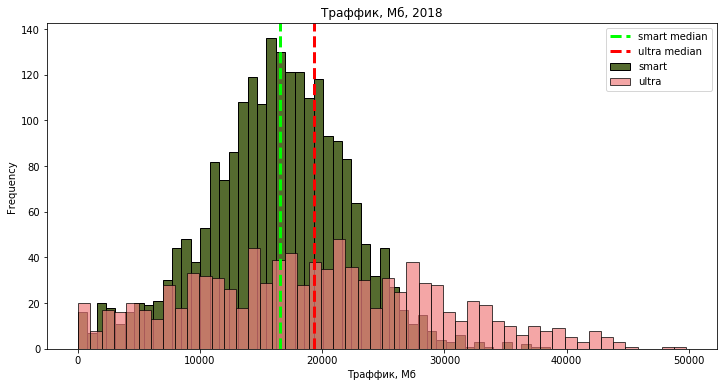

In [75]:
ax = plt.gca()

ax.set_xlabel('Траффик, Мб')
ax.set_title('Траффик, Мб, 2018')

traffic_smart_data.plot(kind='hist', bins=50, figsize=(12,6), ec='black', ax=ax, color='darkolivegreen', alpha = 1);
traffic_ultra_data.plot(kind='hist', bins=50, figsize=(12,6), ec='black', ax=ax, color='lightcoral', alpha = 0.7);

plt.axvline(x=traffic_smart_data.median(),linewidth=3, color='lime', linestyle='--'); #добавим медианы на график
plt.axvline(x=traffic_ultra_data.median(),linewidth=3, color='red', linestyle='--'); #добавим медианы на график
plt.legend(['smart median', 'ultra median', 'smart', 'ultra']);

Заметно, что медиана тарифа smart - 16,5 Гб. Это говорит нам о том, что клиентам явно не хватает заложенных в тариф 15 Гб. Медиана же тарифа ultra находится в районе 19 Гб, До лимита в 30 Гб - запас примерно в 30%. Пользователи ultra охотнее используют интернет. Основной объем траффика находится в пределах 15-20 Гб.



**4 Проверка гипотез**

**Н0 - нулевая гипотеза** - Средняя выручка пользователей тарифов smart и ultra не отличаются друг от друга


**H1 - не нулевая гипотеза** - Средняя выручка пользователей тарифов smart и ultra отличаются друг от друга

**4.1 Проверка Н0**

Посмотрим на выбросы тарифов:

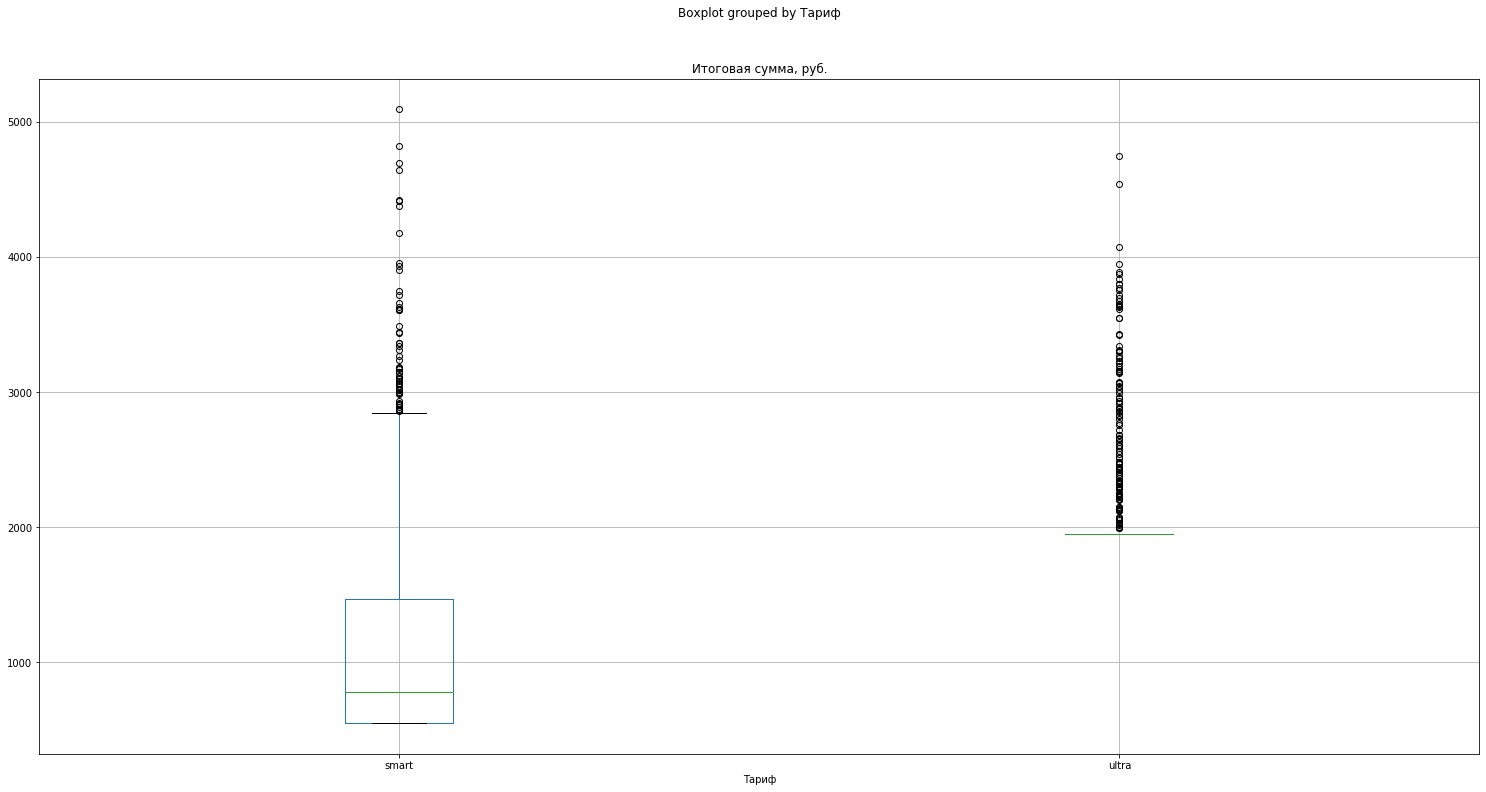

In [76]:
full_df.boxplot(column='Итоговая сумма, руб.', by='Тариф', figsize = (25,12.5));

Найдем интервалы:

In [77]:
sum_int_smart, sum_int_ultra = intervals('Итоговая сумма, руб.','Тариф');

Интервала для столбца "Итоговая сумма, руб." тарифа smart: 0.0 - 2850.0
Интервала для столбца "Итоговая сумма, руб." тарифа "ultra": 1950.0 - 1950.0


Найдем среднемесячную выручку тарифов smart и ultra:

In [78]:
sum_int_smart = full_df[(full_df['Тариф'] == 'smart') &
                                      (full_df['Итоговая сумма, руб.'] >= sum_int_smart[0]) &
                                      (full_df['Итоговая сумма, руб.'] <= sum_int_smart[1])]['Итоговая сумма, руб.']
sum_int_ultra = full_df[(full_df['Тариф'] == 'ultra') &
                                      (full_df['Итоговая сумма, руб.'] >= sum_int_ultra[0]) &
                                      (full_df['Итоговая сумма, руб.'] <= sum_int_ultra[1])]['Итоговая сумма, руб.']

In [79]:
print('Средняя выручка по пользователям тарифа smart: {:.2f}'.format(sum_int_smart.mean()))
print('Средняя выручка по пользователям тарифа ultra: {}'.format(sum_int_ultra.mean()))

Средняя выручка по пользователям тарифа smart: 1030.31
Средняя выручка по пользователям тарифа ultra: 1950.0


**4.2 Расчёт p-value**


Выборки у нас независимые, воспользуемся функцией ttest_ind из модуля scipy.stats:

In [80]:
from scipy.stats import ttest_ind

Пороговое значение alpha = 0.05

In [81]:
stat, p = ttest_ind(sum_int_smart, sum_int_ultra)

In [82]:
print('t =', stat)
print('p-value =', p)

t = -45.052927473020496
p-value = 0.0


**4.3 Вывод**

Нулевыю гипотезу отвергаем

Пользователи тарифа ultra в среднем приносят больше денег из-за стоимости абонентской платы. Клиенты тарифа smart в 75% процентов случаев дозаказывают все виды услуг, однако даже не смотря на этот факт менее прибыльны

**4.4 Определим среднемесячную выручку по Москве и по остальным регионам:**

**H0** - средняя выручка жителей Москвы отличается от жителей других регионов

**H1** - средняя выручка жителей Москвы не отличается от жителей других регионов

Напишем небольшую функцию для фильрации по городу Москве. добавим новый столбец:

In [83]:
def region(row):
    if row['Город'] == 'Москва':
        return 'город Москва'
    else:
        return 'остальные регионы'

full_df['Регионы'] = full_df.apply(region, axis = 1)        

In [84]:
full_df.head(10) #посмотрим

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Доплата, руб.","Итоговая сумма, руб.",Регионы
0,1000,5,17,159.0,22,2256.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,остальные регионы
1,1000,6,28,172.0,60,23257.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,остальные регионы
2,1000,7,41,340.0,75,14016.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,остальные регионы
3,1000,8,42,408.0,81,14070.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,остальные регионы
4,1000,9,46,466.0,57,14581.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,остальные регионы
5,1000,10,44,350.0,73,14717.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,остальные регионы
6,1000,11,37,338.0,58,14768.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,остальные регионы
7,1000,12,38,333.0,70,9827.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,остальные регионы
8,1001,11,45,430.0,0,18452.0,smart,Москва,550,0.0,0,3092.0,604,1154,город Москва
9,1001,12,47,414.0,0,14053.0,smart,Москва,550,0.0,0,0.0,0,550,город Москва


Построим boxplot'ы для определения выбросов:

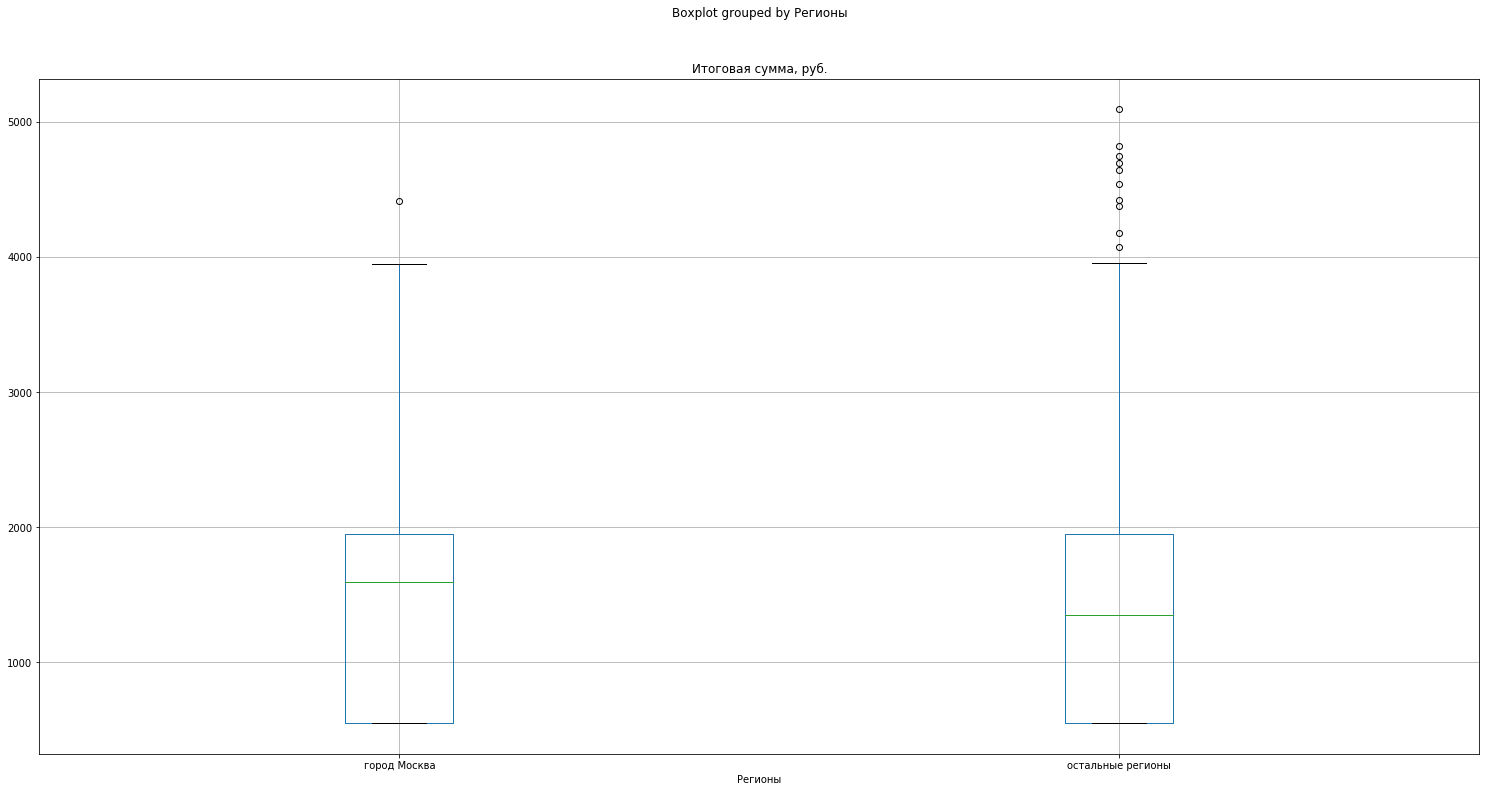

In [85]:

full_df.boxplot(column ='Итоговая сумма, руб.', by='Регионы', figsize = (25,12.5));

Найдем интервалы:

Немного видоизменим функцию intervals:

In [86]:
def msk_intervals(column, data_filter):
    format_name = 'Регионы'
    data1, data2 = 'остальные регионы', 'город Москва'
    format_end1 = 'для регионов'
    format_end2 = 'для Москвы'
    
    q1_1 = full_df[full_df[data_filter] == data1][column].quantile(0.25)
    q3_1 = full_df[full_df[data_filter] == data1][column].quantile(0.75)
    diff_1 = q3_1 - q1_1
    
    left_int_1 = np.where((q1_1 - 1.5 * diff_1) > 550, q1_1 - 1.5 * diff_1, 550)
    right_int_1 = np.where((q3_1 + 1.5 * diff_1) > 0, q3_1 + 1.5 * diff_1, 0)
    
    q1_2 = full_df[full_df[data_filter] == data2][column].quantile(0.25)
    q3_2 = full_df[full_df[data_filter] == data2][column].quantile(0.75)
    diff_2 = q3_2 - q1_2
    
    left_int_2 = np.where((q1_2 - 1.5 * diff_2) > 550, q1_2 - 1.5 * diff_2, 550)
    right_int_2 = np.where((q3_2 + 1.5 * diff_2) > 0, q3_2 + 1.5 * diff_2, 0)
    
    print('Интервала для столбца "{}" {}: {} - {}'.format(column, format_end1, left_int_1, right_int_1))
    print('Интервала для столбца "{}" {}: {} - {}'.format(column, format_end2, left_int_2, right_int_2))
    
    return (left_int_1, right_int_1), (left_int_2, right_int_2)
    

In [87]:
sum_int_smart, sum_int_ultra = msk_intervals('Итоговая сумма, руб.','Регионы');

Интервала для столбца "Итоговая сумма, руб." для регионов: 550.0 - 4050.0
Интервала для столбца "Итоговая сумма, руб." для Москвы: 550.0 - 4050.0


Найдем среднемесячную выручку по Москве и регионам:

In [88]:
sum_moscow = full_df[(full_df['Город'] == 'Москва') &
                                      (full_df['Итоговая сумма, руб.'] >= sum_int_smart[0]) &
                                      (full_df['Итоговая сумма, руб.'] <= sum_int_smart[1])]['Итоговая сумма, руб.']
sum_region = full_df[(full_df['Город'] != 'Москва') &
                                      (full_df['Итоговая сумма, руб.'] >= sum_int_ultra[0]) &
                                      (full_df['Итоговая сумма, руб.'] <= sum_int_ultra[1])]['Итоговая сумма, руб.']

In [89]:
print('Средняя выручка по пользователям в месяц в Москва: {:.2f}'.format(sum_moscow.mean()))
print('Средняя выручка по пользователям в месяц в регионах: {:.2f}'.format(sum_region.mean()))

Средняя выручка по пользователям в месяц в Москва: 1420.27
Средняя выручка по пользователям в месяц в регионах: 1367.57


В среднем за месяц в Москве тратят на 53р больше

**4.4 Расчёт p-value**

In [90]:
stat, p = ttest_ind(sum_moscow, sum_region)

Пороговое значение alpha = 0.05

In [91]:
print('t =', stat)
print('p-value =', p)

t = 1.5797264724901234
p-value = 0.11426832368050525


**4.5 Вывод** 

Мы не можем опровергнуть нулевую гипотезу: средняя выручка жителей Москвы не отличается от выручки жителей других регионов. Видно, что в среднем в Москве платят на 50р больше. Данный разрыв не является статистически значимым



**5 Общий вывод**

Тариф "smart" приносит 55% прибыли компании "Мегалайн". Данный процент генерируют порядка 2200 пользователей. В среднем пользователям не хватает 2 ГБ интернета и они вынуждены доплачивать за траффик порядка 400 рублей.(Переплачивают порядка 60%) 15 Гб явно не хватает клиентам. На этом тарифе пользователи в среднем практически выбирают лимит по звонкам: 420 минут из 500. Дозаказывают же каждый из видов услуг.

Тариф "ultra" приносит 45% прибыли, но пользователей в 2 раза меньше: 1000 человек. Тариф комфортный и дорогой. Иногда  дозаказывают только интернет (1Гб - 150р). Лимитов по всем типам связи хватает.

Можно сделать вывод, что компании "Мегалайн" нужно проработать создание тарифа промежуточного. Данные по переплатам тарифа smart показывают, что клиент готов платить более чем 550р в месяц практически в два раза. Допустим это будет тариф с абонентской платой в 1000 р в месяц с лимитом траффика 20-25 Гб

